<a href="https://colab.research.google.com/github/hmaldonado12/7506R-1C2024-GRUPO6/blob/main/Copy_of_Copia_de_7506R_TP1_GRUPO06_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

#### **PREPRACION DE LOS DATOS**
Crear un nuevo dataset que contemplen los siguientes atributos :
- Tipos de vivienda : Casa, Ph Y Departamentos
- Moneda de transacción : Dolares (USD)
- Ubicacion : Capital Federal

##### **1.1 Mostrar informacion del dataset con los filtros requeridos del enunciado**

In [7]:
import pandas as pd
properties_argentina = pd.read_csv('properati_argentina_2021.csv')

attributes_list = ["property_type", "operation", "property_currency", "place_l2"]
conditions_list = [["Casa", "PH","Departamento"],["Venta"],["USD"],["Capital Federal"]]

def get_dataframe_by(data, attributes: list, conditions: list):
    is_casa = data[attributes[0]] == conditions[0][0]
    is_ph = data[attributes[0]] == conditions[0][1]
    is_departamento = data[attributes[0]] == conditions[0][2]
    is_operation_venta = data[attributes[1]] == conditions[1][0]
    is_property_currency_usd = data[attributes[2]] == conditions[2][0]
    is_place_l2_capital_federal = data[attributes[3]] == conditions[3][0]
    return data[(is_casa | is_ph | is_departamento) & is_operation_venta & is_property_currency_usd & is_place_l2_capital_federal]

properties_argentina_filtered = get_dataframe_by(properties_argentina, attributes_list, conditions_list)
properties_argentina_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7427 entries, 25 to 36525
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7427 non-null   object 
 1   start_date                7427 non-null   object 
 2   end_date                  7427 non-null   object 
 3   created_on                7427 non-null   object 
 4   latitud                   7115 non-null   float64
 5   longitud                  7115 non-null   float64
 6   place_l2                  7427 non-null   object 
 7   place_l3                  7386 non-null   object 
 8   place_l4                  307 non-null    object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 7427 non-null   object 
 12  property_type             7427 non-null   object 
 13  property_rooms            7301 non-null   float64
 14  property_be

## **ENTENDER EL PROBLEMA**
El objetivo del tp es poder entrenar un modelo que pueda predecir el valor de venta de un inmueble en cualquier barrio de capital federal.

Antes de empezar a crear y entrenar nuestro modelo, es importante realizar las siguientes preguntas :
-  ¿ Que tipo de supervision necesitara nuestro modelo ?
    
    Tarea de aprendizaje de supervision, ya que los datos cuentan con ejemplos etiquetados( Cada instancia viene con una salida esperada, el precio del inmueble)
- ¿Que tipo de aprendizaje ?
    
    En este caso el tipo de aprendizaje es por lotes, ya que no contamos con datos que evolucionen de forma constante
- ¿ Que modelo podemos utilizar ?
    
    Puede ser un modelo de regresion ya que se pide predecir un valor.

### COMPROBACIONES PLANTEADAS EN EL TP
Las comprobaciones nos daran un entendimiento mas profundo sobre los datos. Con lo conocimientos de los datos vamos a tener mas criterio para poder limpiar los mismo y poder entrenar el modelo.
#### a) Exploración Inicial : analizar cada variable, considerando los siguientes aspectos
- Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda,etc

In [8]:
properties_argentina_filtered.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,7115.000000,7115.000000,0.0,7301.000000,6598.000000,7022.000000,7095.000000,7.427000e+03
mean,-34.587070,-58.459186,NaN,2.814820,2.003031,96.412418,110.368992,2.211362e+05
std,0.239555,0.377854,NaN,1.436779,1.106702,186.464198,2579.602742,3.003275e+05
min,-41.163826,-71.438923,NaN,1.000000,1.000000,10.000000,1.000000,1.154500e+04
25%,-34.617105,-58.467469,NaN,2.000000,1.000000,45.000000,40.000000,9.650000e+04
50%,-34.595198,-58.440373,NaN,3.000000,2.000000,65.000000,57.000000,1.433000e+05
75%,-34.576354,-58.410609,NaN,4.000000,3.000000,101.000000,87.000000,2.300000e+05
max,-24.770804,-58.343954,NaN,30.000000,20.000000,10500.000000,217000.000000,9.900000e+06


#### b) Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [9]:
properties_argentina_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7427 entries, 25 to 36525
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7427 non-null   object 
 1   start_date                7427 non-null   object 
 2   end_date                  7427 non-null   object 
 3   created_on                7427 non-null   object 
 4   latitud                   7115 non-null   float64
 5   longitud                  7115 non-null   float64
 6   place_l2                  7427 non-null   object 
 7   place_l3                  7386 non-null   object 
 8   place_l4                  307 non-null    object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 7427 non-null   object 
 12  property_type             7427 non-null   object 
 13  property_rooms            7301 non-null   float64
 14  property_be

#### c) Determinar variables irrelevantes en el análisis
Con la informacion del punto anterior podemos determinar algunas variables que no son relevantes para nuestro modelo, es decir no nos van aportar informacion de calidad que sirva para el entranamiento del modelo.

##### **Analisis :**
c.1) Los atributos start_date, end_date y create_on  hacen referencia a las fechas en las cuales se crearon los datos, por lo tanto esto no es relevante para nuestro modelo de prediccion

c.2) Los atributos place_l3 y place_l4, no conocemos a fondo que tipo de informacion nos pueden aportar para determinar el precio de  una propiedad. Vamos a mostrar en detalle que tio de informacion tienen ambos atributos en forma de tabla.

Loas atributos place_l2 , place_l5 y place_l6 los dejamos afurea del analisis ya que por parte de place_l2 lo utilizamos para filtrar la informacion por capital federal y place_l6,place_5 directamente no tiene datos


#### **PLACE_L3**

In [10]:
counts_place_l3 = properties_argentina_filtered["place_l3"]
print(counts_place_l3.value_counts())

place_l3
Palermo                 1143
Belgrano                 748
Caballito                555
Recoleta                 437
Villa Urquiza            417
Almagro                  294
Flores                   281
Nuñez                    264
Villa Crespo             251
Barrio Norte             226
Balvanera                190
Colegiales               168
Barracas                 159
Saavedra                 148
Villa del Parque         130
Villa Devoto             129
San Telmo                114
Boedo                     97
Puerto Madero             96
Monserrat                 90
Parque Chacabuco          81
San Cristobal             78
Coghlan                   77
Villa Pueyrredón          76
San Nicolás               76
Liniers                   75
Retiro                    71
Floresta                  70
Villa Lugano              70
Mataderos                 65
Villa Luro                62
Chacarita                 60
Villa Ortuzar             54
Parque Patricios          53
Const

#### **PLACE_L4**

In [11]:
counts_place_l4 = properties_argentina_filtered["place_l4"]
print(counts_place_l4.value_counts())

place_l4
Palermo Hollywood    150
Palermo Soho          74
Palermo Chico         67
Palermo Viejo         16
Name: count, dtype: int64


Podemos concluir que son atributos relevantes ya que el barrio puede influir en el precion de un inmueble.
Los valore irrelevantes para nuestro analisis son :
- start_date
- end_date
- create_on
- place_l5
- place_l6

Por lo tanto estas variables se pueden eliminar del data frame

In [12]:
properties_argentina_filtered = properties_argentina_filtered.drop(columns=["start_date", "end_date", "created_on" ,"place_l5", "place_l6"])

# **Datos Faltantes**

* Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el
porcentaje de datos faltantes con respecto al total del dataset.

Antes de empezar voy a llamar "" a la columna place_l3 y "" a la columna place_l2

In [13]:
properties_argentina_filtered = properties_argentina_filtered.rename(columns={"place_l2":"city","place_l3":"zone"})

Primero busco caracteres raros como "NULL", "?", "-", como no hay ninguno sigo buscando valores faltantes:

In [14]:
filas_totales = properties_argentina_filtered.shape[0]
porcentaje_col_faltante = properties_argentina_filtered.isna().sum() / filas_totales * 100
print(porcentaje_col_faltante)

id                           0.000000
latitud                      4.200889
longitud                     4.200889
city                         0.000000
zone                         0.552040
place_l4                    95.866433
operation                    0.000000
property_type                0.000000
property_rooms               1.696513
property_bedrooms           11.161977
property_surface_total       5.453077
property_surface_covered     4.470176
property_price               0.000000
property_currency            0.000000
property_title               0.000000
dtype: float64


Veo que todos los valores son bajos y no deberia dropear ninguna exceptuando a place_l4, como su funcion es especificar en que parte de Palermo estan algunas propiedades, lo mas lógico sería reemplazar a Palermo por la zona especifica en estas zonas y evitar tener una columna con más de un 96% de datos NaN.

In [15]:
for i in range(1,properties_argentina_filtered.shape[0]):
    fila = properties_argentina_filtered.iloc[i]
    zona = fila["zone"]
    es_NaN = zona!=zona

    if not es_NaN and zona=="Palermo":
      zona_Palermo = fila["place_l4"]
      zona_Pal_NaN = zona_Palermo!=zona_Palermo
      if not zona_Pal_NaN:
        properties_argentina_filtered.iat[i, 4] = zona_Palermo

    i+=1

    properties_argentina_filtered=properties_argentina_filtered

::Ahora vamos a eliminar la columna place_l4 y luego volvemos a ver los datos faltantes por columna pero en un grafico:

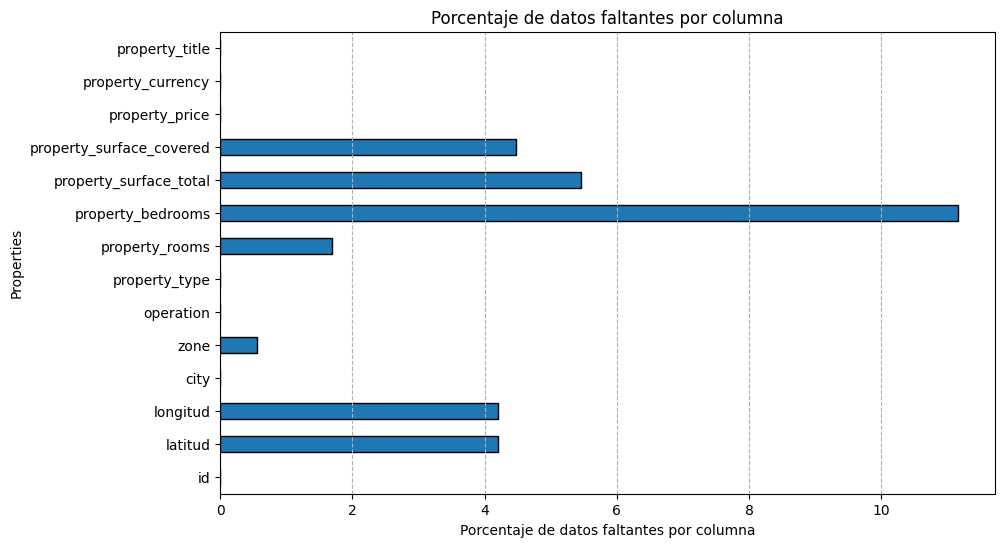

In [16]:
properties_argentina_filtered = properties_argentina_filtered.drop(columns=["place_l4"])
filas_totales = properties_argentina_filtered.shape[0]
porcentaje_col_faltante = properties_argentina_filtered.isna().sum() / filas_totales * 100


porcentaje_col_faltante.plot(kind='barh', figsize=(10, 6), edgecolor='black')
plt.title('Porcentaje de datos faltantes por columna')
plt.ylabel('Properties')
plt.xlabel('Porcentaje de datos faltantes por columna')
plt.grid(axis='x', linestyle='--')
plt.show()

Podemos observar que exceptuando a "property_bedrooms" todas las columnas tienen un porcentaje de datos faltantes menor o similar al 5%.


*  Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.



Primero calculo que porcentaje de cada fila falta:

*   Elemento de la lista

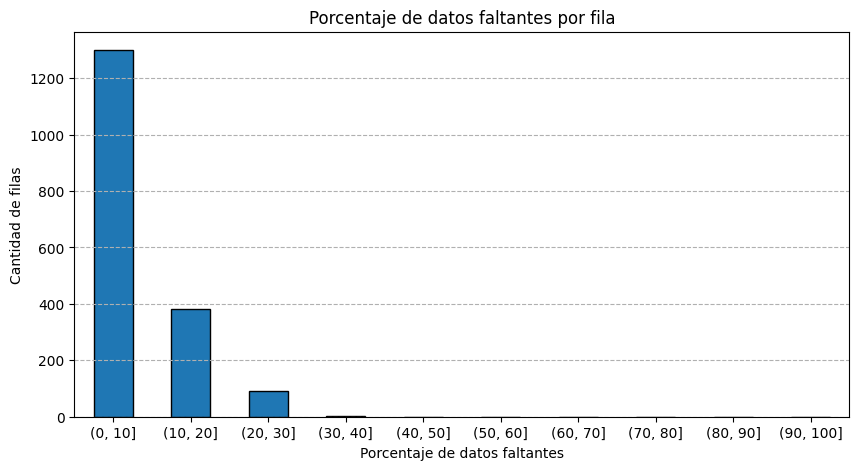

In [17]:
col_totales = len(properties_argentina_filtered.columns)
porcentaje_faltante_fila = properties_argentina_filtered.isna().sum(axis=1) / col_totales * 100

rangos = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
porcentaje_agrupado = pd.cut(porcentaje_faltante_fila, bins=rangos).value_counts().sort_index()
plt.figure(figsize=(10, 5))
porcentaje_agrupado.plot(kind='bar', edgecolor='black')
plt.title('Porcentaje de datos faltantes por fila')
plt.xlabel('Porcentaje de datos faltantes')
plt.ylabel('Cantidad de filas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Se puede ver que las mayoría de las filas tienen entre un 0% y un 10% de datos faltantes, otros entre un 10% y un 20%, algunos pocos entre 20% y 30% y finalmente una porción muy menor entre el 30% y 40%.



*  Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.



**Primero** voy a asignarles la latitud y longitud a todas las filas que tengan una zona, les voy a asiganar la media de todos las filas de la misma zona.

In [18]:
reparado = properties_argentina_filtered

place_l3_copy = properties_argentina_filtered["zone"]
place_l3_drop = place_l3_copy.drop_duplicates()
zones = place_l3_drop.values

media_zones = {}    #Me guardo las medias de (latitud,longitud) de c/zona

for zone in zones:
      zone_act = reparado[reparado["zone"]==zone]
      lat_med = zone_act["latitud"].mean()
      lon_med = zone_act["longitud"].mean()
      media_zones[zone] = (lat_med,lon_med)
      zone_act = zone_act.fillna({"latitud":lat_med,"longitud":lon_med})
      reparado[reparado["zone"]==zone]=zone_act


Ahora los únicas filas que no tienen latitud o longitud son los que tampoco tienen zona y esos los dropeamos ya que asignarle una zona basandonos en datos como precios y superficie total/cubierta podría alterar las mediciones que se quieran hacer en el futuro

In [19]:
reparado.shape

(7427, 14)

Este es el número de filas antes de eliminar

In [20]:
import math

i = 0
while i < reparado.shape[0]:
  fila = reparado.iloc[i]
  lat = fila["latitud"]
  if math.isnan(lat):
    reparado.drop(reparado.index[i:i+1], inplace=True)
  else:
    i+=1


reparado.shape

(7418, 14)

Este es el nuevo número de filas.

Ahora voy a asignarle un barrio a aquellas filas que no tienen pero si tienen latitud y longitud, para eso voy a calcular la distancia entre la ubicacion y la media de cada zona. Voy a calcular la diferencia entre la latitud y la longitud de cada fila y la media, luego calculo un promedio (diferencia de latitud sumado la diferencia de longitud dividido 2) y el barrio que menor diferencia tenga sera el elegido.

In [21]:
for i in range(1,reparado.shape[0]):
    fila = reparado.iloc[i]
    zona = fila["zone"]
    bool = zona!=zona

    if bool:
      lat=fila["latitud"]
      lon=fila["longitud"]
      dist_menor = abs( abs(media_zones["Palermo"][0]) - abs(lat) ) + abs( abs( abs(media_zones["Palermo"][1] ) - abs(lon) ))
      barrio = "Palermo"

      # print("ARRANCA CON PALERMO:","lat:",lat,"lon:",lon)
      for c in media_zones:

          tupla_dist = media_zones.get(c)
          nueva_dist = abs( abs(tupla_dist[0]) - abs(lat) ) + abs( abs( abs(tupla_dist[1] ) - abs(lon) ))
          es_menor = nueva_dist<dist_menor

          if es_menor:
            dist_menor=nueva_dist
            barrio = c

      # reparado.iloc[i]["zone"] = barrio
      reparado.iat[i, 4] = barrio


    i+=1

reparado = reparado


Vemos que no hay ningun NaN restante en la columna zone:

In [22]:
reparado["zone"].isna().value_counts()

zone
False    7418
Name: count, dtype: int64

Ahora vamos a completar la columna "property_surface_total" la cual se podría calcular teniendo en cuenta el precio medio por m2 de cada zona.

In [23]:
prec_m2 = {}

for zona in zones:
  zona_act = reparado[reparado["zone"]==zona]
  prec_tot = 0
  sup_tot = 0

  for i in range(0,zona_act.shape[0]):
    fila = zona_act.iloc[i]
    prec = fila["property_price"]
    sup = fila["property_surface_total"]

    if not sup!=sup:    #es decir si la columna property_surface_total no es NaN
      prec_tot+=prec
      sup_tot+=sup

  if sup_tot!=0:
    prec_prom = prec_tot/sup_tot

    prec_m2[zona]= prec_prom





Ahora que ya sabemos los precios del m2 podriamos hacer una regla de 3 y sabiendo el precio de la propiedad obtener un estimado realista de la superficie total de esta.

In [24]:
for i in range (0,reparado.shape[0]):
  fila = reparado.iloc[i]
  zona = fila["zone"]
  sup = fila["property_surface_total"]
  if sup!=sup:
      prec = fila["property_price"]
      sup_calc = prec/prec_m2.get(zona)
      reparado.iat[i, 9] = sup_calc


Ahora buscamos el porcentaje de superficie cubierta por zona, este sera un porcentaje de la superficie total y sera: (sup_cub * 100)/sup_tot.
Ahora calculamos ese porcentaje por zona:

In [25]:
porc_sup_cub = {}

for zona in zones:
  zona_act = reparado[reparado["zone"]==zona]
  sup_tot = 0
  sup_cub = 0

  for i in range(0,zona_act.shape[0]):
    fila = zona_act.iloc[i]
    s_tot = fila["property_surface_total"]
    s_cub = fila["property_surface_covered"]

    if not s_cub!=s_cub:    #es decir si la columna property_surface_covered no es NaN
      sup_tot+=s_tot
      sup_cub+=s_cub

  if sup_tot!=0:
    porc_cub = (sup_cub * 100)/sup_tot
    porc_sup_cub[zona]= porc_cub

Ahora que ya sabemos los porcentajes de superficie cubierta con respecto a la superficie total hay que imputar la superficie cubierta de aquellas filas que no posean ese dato:

In [26]:
for i in range (0,reparado.shape[0]):
  fila = reparado.iloc[i]
  zona = fila["zone"]
  sup_cub = fila["property_surface_covered"]
  if sup_cub!=sup_cub:
      sup_tot = fila["property_surface_total"]
      nueva_sup_cub = sup_tot * porc_sup_cub.get(zona)
      reparado.iat[i, 10] = nueva_sup_cub

Ahora voy a calcular el promedio de superficie cubierta por habitación que hay en cada zona para luego poder estimar cuantas habitaciones (rooms) tiene cada propiedades a las que le falte el dato.

In [27]:
met_por_hab = {}

for zona in zones:
  zona_act = reparado[reparado["zone"]==zona]
  r_mediana = zona_act["property_rooms"].median()
  s_mediana = zona_act["property_surface_total"].median()
  met_por_hab[zona]=s_mediana/r_mediana


Teniendo el promedio de metros por habitación de cada zona, calculo e imputo los datos de property_rooms faltantes

In [28]:
for i in range (0,reparado.shape[0]):
  fila = reparado.iloc[i]
  zona = fila["zone"]
  rooms = fila["property_rooms"]
  if rooms!=rooms:
      sup_cub = fila["property_surface_covered"]
      nuevo_rooms = sup_cub / met_por_hab.get(zona)
      reparado.iat[i, 7] = nueva_sup_cub

Finalmente solo queda completar la columna property_beedrooms, para la cual primero calcularemos por zona el porcentaje de rooms que son bedrooms, esto para luego poder estimar cuantos bedrooms hay utilizando el dato property_rooms

In [29]:
por_bedrooms = {}

rooms=reparado["property_rooms"].median()
bedrooms=reparado["property_bedrooms"].median()
porcentaje_mediana_gral = (bedrooms*100)/rooms


for zona in zones:
  zona_act = reparado[reparado["zone"]==zona]
  r_mediana = zona_act["property_rooms"].median()
  b_mediana = zona_act["property_bedrooms"].median()
  porcentaje = (b_mediana * 100)/r_mediana
  if porcentaje==100.0:
    porcentaje=porcentaje_mediana_gral
  por_bedrooms[zona] = porcentaje


Ahora queda imputar el dato en aquillas filas donde no esta:

In [30]:
for i in range (0,reparado.shape[0]):
  fila = reparado.iloc[i]
  zona = fila["zone"]
  bedrooms = fila["property_bedrooms"]
  if bedrooms!=bedrooms:
      rooms = fila["property_rooms"]
      calc_bedrooms = (rooms*por_bedrooms.get(zona)/100)
      reparado.iat[i, 8] = round(calc_bedrooms)

Podemos ver que ya no hay datos faltantes:

In [31]:
reparado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7418 entries, 42 to 36525
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7418 non-null   object 
 1   latitud                   7418 non-null   float64
 2   longitud                  7418 non-null   float64
 3   city                      7418 non-null   object 
 4   zone                      7418 non-null   object 
 5   operation                 7418 non-null   object 
 6   property_type             7418 non-null   object 
 7   property_rooms            7418 non-null   float64
 8   property_bedrooms         7418 non-null   float64
 9   property_surface_total    7418 non-null   float64
 10  property_surface_covered  7418 non-null   float64
 11  property_price            7418 non-null   float64
 12  property_currency         7418 non-null   object 
 13  property_title            7418 non-null   object 
dtypes: float64(

Finalmente se podrían quitar las columnas "property_currency" ya que todas estan en USD y la columna "id" ya que todos los id son únicos y no aportan informacion

In [32]:
reparado = reparado.drop(columns=["id", "property_currency"])

Y ahora la estructura es la siguiente:

In [33]:
reparado.head(1)

,latitud,longitud,city,zone,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
42,-34.637319,-58.361124,Capital Federal,Boca,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO


# **PRUEBAS PTO 2**

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

Para el Clusterin solo usaremos las columnas: "property_rooms, "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price"


In [35]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale, MinMaxScaler


df_clust = reparado.drop(columns=["latitud","longitud","city","zone","operation","property_type","property_title"])
df_clust.drop(df_clust.index[150:95000], inplace=True)


scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df_clust)

In [36]:
df_clust = df_clust[df_clust["property_rooms"]<20]
df_clust = df_clust[df_clust["property_bedrooms"]<20]
x = df_clust.iloc[:,0:2]
x

,property_rooms,property_bedrooms
42,3.0,2.0
43,4.0,3.0
49,4.0,2.0
51,4.0,2.0
53,2.0,1.0
...,...,...
871,2.0,1.0
872,2.0,1.0
874,4.0,3.0
875,3.0,2.0


In [37]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)

Un grafico de la relacion entre

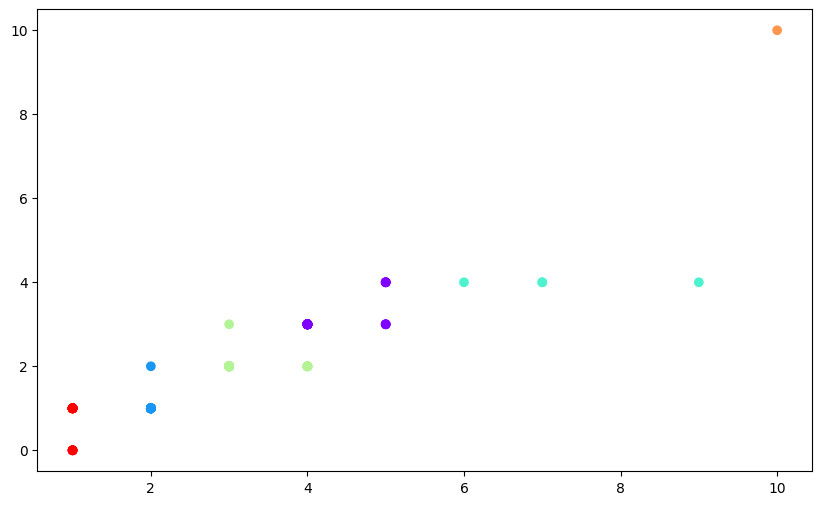

In [38]:
data_with_clusters = df_clust.copy()
data_with_clusters['cluster'] = identified_clusters
plt.figure(figsize=(10,6))
plt.scatter(data_with_clusters["property_rooms"], data_with_clusters["property_bedrooms"], c=data_with_clusters["cluster"], cmap='rainbow')
plt.show()

# b) Estimar la cantidad apropiada de grupos que se deben formar.

Para este punto usaremos el Elbow Method:

Text(0, 0.5, 'Distancia promedio al centroide')

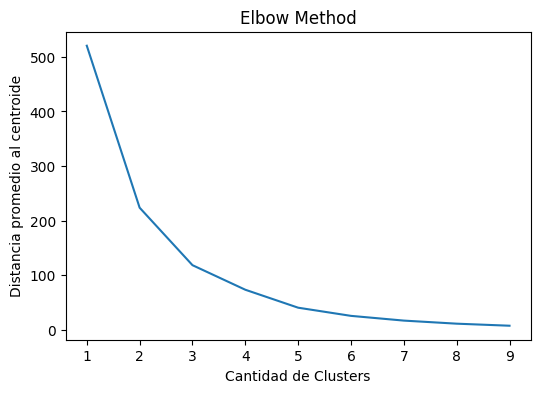

In [39]:
distancias_prom = []
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x)
  iner = kmeans.inertia_
  distancias_prom.append(iner)

cant_clust = range(1,10)
plt.figure(figsize=(6,4))
plt.plot(cant_clust,distancias_prom)
plt.title('Elbow Method')
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Distancia promedio al centroide')

En base al gráfico podemos deducir que utilizar 4 clusters sería lo ideal

In [40]:
from sklearn.metrics import silhouette_score

list_k = list(range(2,6))

for n in list_k:
  clusterer = KMeans(n_clusters=n)
  preds = clusterer.fit_predict(x)

  score = silhouette_score(x,preds)
  print('For n =' + str(n) + 'silhouette score is ' + str(score))

For n =2silhouette score is 0.6144498913449523
For n =3silhouette score is 0.669451983432148
For n =4silhouette score is 0.7182138510300524
For n =5silhouette score is 0.7287916094342692


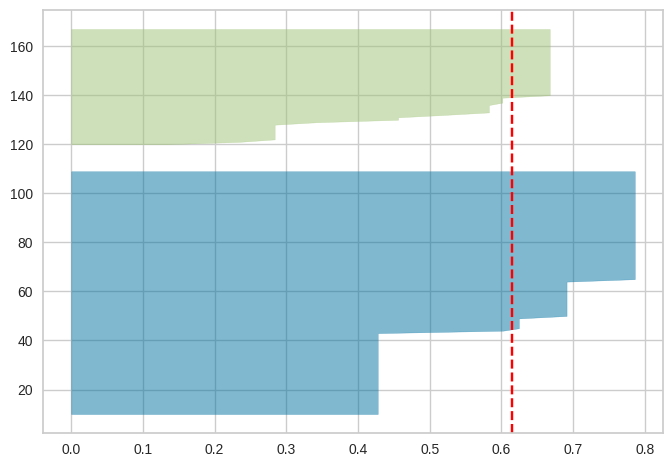

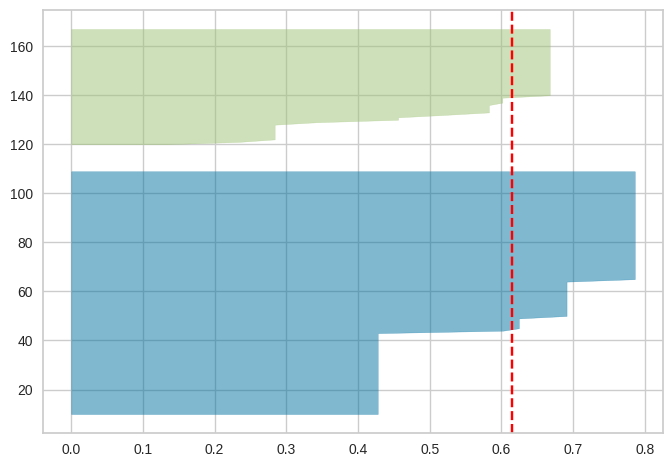

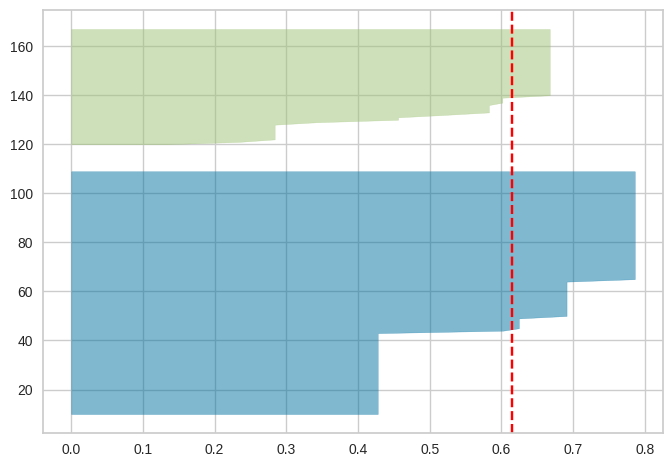

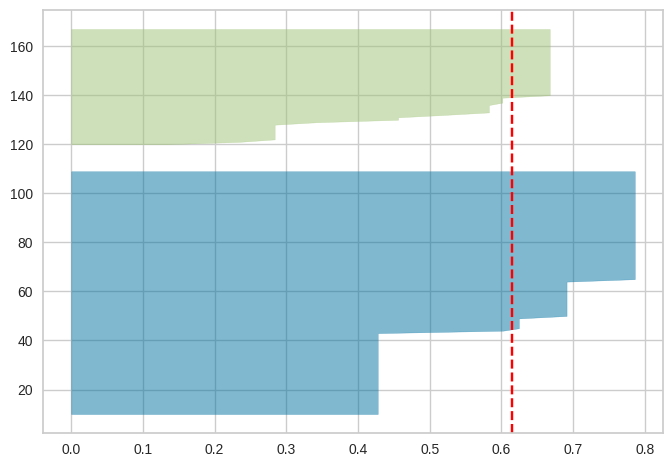

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,6):
  model = KMeans(n_clusters=2,random_state=0)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(x)
  plt.show()